<a href="https://colab.research.google.com/github/irisyshin/webstart/blob/main/%ED%8B%B0%EC%B2%98%EB%B8%94%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%98%88%EC%B8%A1%EC%84%9C%EB%B9%84%EC%8A%A4_ys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

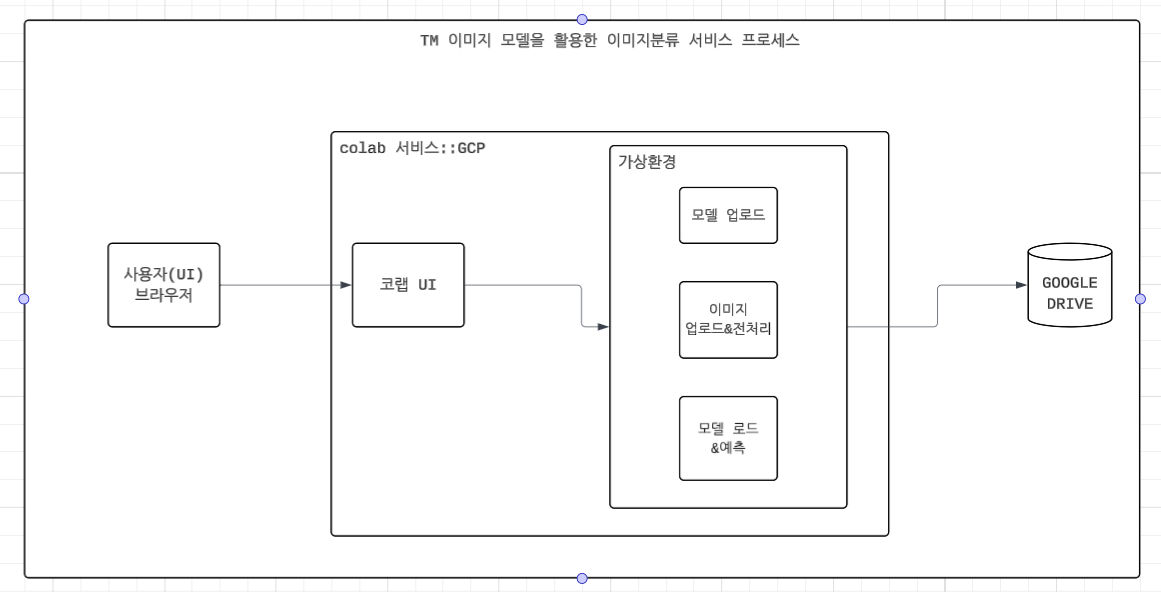

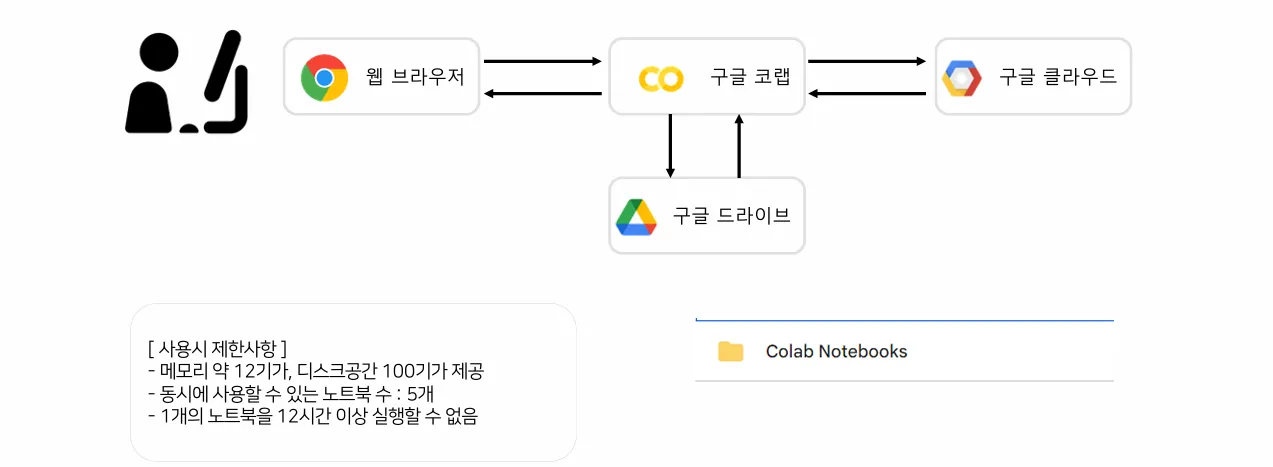

티처블 머신의 모델을 지원하는 텐서플로우 버전으로 설치한다.

In [ ]:
!pip install tensorflow==2.12.0
#세션 다시 시작해야 한다.

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.9 MB/s eta 0:00:00
 

# 실습1. 티처블머신 코드스니펫 사용하기



```
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("<IMAGE_PATH>").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

```




In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np
import tensorflow as tf

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Load the model
model = load_model("keras_model.h5", compile=False, custom_objects={'DepthwiseConv2D': tf.keras.layers.DepthwiseConv2D})

In [ ]:
# Load the labels
class_names = open("labels.txt", "r").readlines()

In [ ]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image

image = Image.open("paper.png").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array


In [ ]:
# prompt: 이미지 파일의 이름을 리스트로 저장

import os

# Specify the directory containing your image files
image_directory = './'  # Replace with the actual path to your images

# List all files in the directory
all_files = os.listdir(image_directory)

# Filter out files that are image files (you might need to adjust the extensions)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Print the list of image file names
image_files

# You can now use the 'image_files' list to iterate through the image files


In [ ]:
# prompt: image_files 를 이용한 예측
# image file list,

# Specify the directory containing your image files
image_directory = './'  # Replace with the actual path to your images

# List all files in the directory
all_files = os.listdir(image_directory)

# Filter out files that are image files (you might need to adjust the extensions)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# You can now use the 'image_files' list to iterate through the image files
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)

    image = Image.open(image_path).convert("RGB")

    # resizing the image to be at least 224x224 and then cropping from the center
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    # turn the image into a numpy array
    image_array = np.asarray(image)

    # Normalize the image
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predicts the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score for the current image
    print(f"Image: {image_file}")
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", confidence_score)
    print("-" * 20) # Separator for clarity

In [ ]:

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


# 웹캠을 이용한 티처블머신 모델 예측 서비스 만들기

In [ ]:
# prompt: 웹캠을 이용한 서비스 예측

from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
from PIL import Image
import io
from google.colab import files

# 모델 로드
model = tf.keras.models.load_model('keras_model.h5')

# 이미지 전처리 함수
def preprocess_image(image_bytes):
    try:
        image = Image.open(io.BytesIO(image_bytes))
        image = image.resize((224, 224))
        image = np.array(image) / 255.0
        image = np.expand_dims(image, axis=0)
        return image
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None

# 예측 함수
def predict(image_bytes):
    preprocessed_image = preprocess_image(image_bytes)
    if preprocessed_image is None:
        return None

    predictions = model.predict(preprocessed_image)
    predicted_class = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class]

    # 클래스 이름 매핑 (Teachable Machine에서 사용한 클래스 이름으로 변경)
    class_names = ['rock', 'paper', 'scissors']  # 실제 클래스 이름으로 수정
    predicted_class_name = class_names[predicted_class]

    return predicted_class_name, confidence



In [ ]:
# 웹캠 이미지 캡처 및 예측 (Google Colab에서 실행)
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
# @title

try:
  filename = take_photo()
  #filename = '106.jpg'
  print('Saved to {}'.format(filename))

  with open(filename, "rb") as f:
    image_bytes = f.read()
    predicted_class_name, confidence = predict(image_bytes)
    if predicted_class_name:
        print(f"Predicted class: {predicted_class_name}, Confidence: {confidence}")
    else:
        print("Prediction failed")

except Exception as err:
  print(str(err))